# Introduction to data exploration mainly using Pandas

In [2]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Pandas dataframe and series

The first step will be to open a CSV file which contain some information about some voting count of a referendum in France.

In [3]:
filename_referendum = os.path.join('data', 'referendum.csv') # ouvrir les donnes
filename_referendum

'data\\referendum.csv'

The data are not separated with a comma but a semi-colummn.

In [4]:
df = pd.read_csv(filename_referendum, sep=';')

In [5]:
df.head()  # regarder le debut

,Department code,Department name,Town code,Town name,Registered,Abstentions,Null,Choice A,Choice B
0,1,AIN,1,L'Abergement-Clémenciat,592,84,9,154,345
1,1,AIN,2,L'Abergement-de-Varey,215,36,5,66,108
2,1,AIN,4,Ambérieu-en-Bugey,8205,1698,126,2717,3664
3,1,AIN,5,Ambérieux-en-Dombes,1152,170,18,280,684
4,1,AIN,6,Ambléon,105,17,1,35,52


In [6]:
df.tail()  # regarder la fin

,Department code,Department name,Town code,Town name,Registered,Abstentions,Null,Choice A,Choice B
36786,ZZ,FRANCAIS DE L'ETRANGER,7,Europe centrale,89643,54981,318,17055,17289
36787,ZZ,FRANCAIS DE L'ETRANGER,8,"Europe du Sud, Turquie, Israël",109763,84466,292,9299,15706
36788,ZZ,FRANCAIS DE L'ETRANGER,9,Afrique Nord-Ouest,98997,59887,321,22116,16673
36789,ZZ,FRANCAIS DE L'ETRANGER,10,"Afrique Centre, Sud et Est",89859,46782,566,17008,25503
36790,ZZ,FRANCAIS DE L'ETRANGER,11,"Europe de l'est, Asie, Océanie",80061,42911,488,13975,22687


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 9 columns):
Department code    36791 non-null object
Department name    36791 non-null object
Town code          36791 non-null int64
Town name          36791 non-null object
Registered         36791 non-null int64
Abstentions        36791 non-null int64
Null               36791 non-null int64
Choice A           36791 non-null int64
Choice B           36791 non-null int64
dtypes: int64(6), object(3)
memory usage: 2.5+ MB


In [8]:
df.index

RangeIndex(start=0, stop=36791, step=1)

In [9]:
df.columns

Index(['Department code', 'Department name', 'Town code', 'Town name',
       'Registered', 'Abstentions', 'Null', 'Choice A', 'Choice B'],
      dtype='object')

It will be easier with we use the name of the city as an index.

In [ ]:
df = df.set_index('Town name')  # nom des villes comme index

In [ ]:
df.head()

## 2. Simple analysis

* What is the city with the most registered people?

In [ ]:
df.loc[:, 'Registered'].head()

In [ ]:
col_registered = df.loc[:, 'Registered']

In [ ]:
col_registered.max()

In [ ]:
col_registered == col_registered.max()

In [ ]:
mask_most_registered = col_registered == col_registered.max()

In [ ]:
col_registered.loc[mask_most_registered]

In [ ]:
df.loc[mask_most_registered]

* What is the city with the least number of registered persons?

In [ ]:
mask_least_registered = col_registered == col_registered.min()

In [ ]:
df.loc[mask_least_registered]

Let's go to the `notebook.ipynb` to formalize the different aspect we just used up to now.

## 3. Group information together.

Let's now make a more advance analysis. Instead to make a micro-analysis by cities, we would like to make a macro-analysis by department.

In [ ]:
df.head()

Therefore, we would like group the votes by department and add them up.

In [ ]:
df.groupby('Department code').sum()

In [ ]:
df_department = df.groupby(['Department code', 'Department name']).sum().reset_index()
df_department

## 4. Merging information together

We would like to plot some of the information into the a map.

In [10]:
import geopandas as gpd

In [11]:
gdf_department = gpd.read_file(os.path.join('data', 'departements.geojson'))

In [12]:
type(gdf_department)

geopandas.geodataframe.GeoDataFrame

In [13]:
gdf_department.head()

,code,nom,geometry
0,02,Aisne,"POLYGON ((3.17270 50.01200, 3.18220 50.01234, ..."
1,10,Aube,"POLYGON ((3.41479 48.39027, 3.42208 48.41334, ..."
2,14,Calvados,"POLYGON ((-1.11962 49.35557, -1.11503 49.36240..."
3,15,Cantal,"POLYGON ((2.50841 45.47850, 2.52444 45.48070, ..."
4,28,Eure-et-Loir,"POLYGON ((0.81482 48.67016, 0.82767 48.68072, ..."


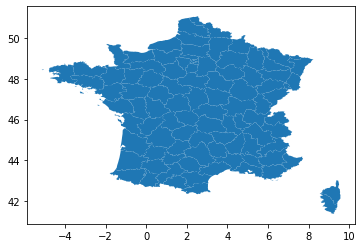

In [15]:
gdf_department.plot()

So what we need at that stage is to merge the different dataframe together.

In [ ]:
df = gdf_department.merge(df_department, how='inner', left_on='code', right_on='Department code')

In [ ]:
df.plot(column='Registered')

## 5. Bug correction

In [ ]:
def prepend_zero(code):
    if len(code) == 1:
        return '0' + code
    return code

df_department['Department code'] = df_department['Department code'].apply(prepend_zero)

In [ ]:
df = gdf_department.merge(df_department, how='inner', left_on='code', right_on='Department code')

In [ ]:
df.head()

In [ ]:
df.plot(column='Registered')

In [ ]:
df.plot(column='Choice A')

In [ ]:
df.plot(column='Choice B')

In [ ]:
df_normalized = df.copy()

In [ ]:
df_normalized['Choice A'] /= df[['Choice A', 'Choice B']].sum(axis=1)
df_normalized['Choice B'] /= df[['Choice A', 'Choice B']].sum(axis=1)

In [ ]:
df_normalized.plot(column='Choice B')

In [ ]:
df_normalized.plot(column='Choice A')

## 6. This your turn

The goal will be to repeat the analysis but at the region scale. However, this is not as easy. The regions information in directly available and we will need to import it from another external source.

* Open the `data/referendum.csv` file.

In [ ]:
# %load solutions/24_solutions.py
df_referendum = pd.read_csv(filename_referendum, sep=';')


* Show the 5 first rows.

In [ ]:
# %load solutions/25_solutions.py
df_referendum.head()


As you can see, there is no information about the regions. Before to get to this stage, let's correct the issue with the deparment numbering.

In [ ]:
# %load solutions/26_solutions.py
df_referendum['Department code'] = df_referendum['Department code'].apply(
    lambda x: '0' + x if len(x) == 1 else x
)
df_referendum.head()


* Load the information related to the regions from the file `data/regions.csv`. Show the 5 first rows.

In [ ]:
# %load solutions/27_solutions.py
df_regions = pd.read_csv(os.path.join('data', 'regions.csv'))
df_regions.head()


* Lead the information related to the departments from the file `data/departments.csv`. Show the 5 first rows.

In [ ]:
# %load solutions/28_solutions.py
df_departments = pd.read_csv(os.path.join('data', 'departments.csv'))
df_departments.head()


* Find the column in the departments dataframe which is related to the `code` column of the regions dataframe. Merge both dataframe using these informations. Show the 5 first rows of the resulting dataframe.

In [ ]:
# %load solutions/29_solutions.py
# pd.merge(df_departments, df_regions, how='inner', left_on='region_code', right_on='code')
df_reg_dep = df_departments.merge(df_regions, how='inner', left_on='region_code', right_on='code')
df_reg_dep.head()


* In the previous dataframe as column linked to the department code which could be merged with our referendum data as we did previously. Since we already got information about the regions, we can get the regions dataframe with a new merge. Show the 5 first rows of the merged dataframe.

In [ ]:
# %load solutions/30_solutions.py
df = df_referendum.merge(df_reg_dep, how='inner', left_on='Department code', right_on='code_x')
df.head()


* Group and add up the vote by region and show the resulting dataframe.

In [ ]:
# %load solutions/31_solutions.py
regions_vote = df.groupby(['code_y', 'name_y']).sum()
regions_vote


* Taking example on the previous case, plot the vote for the "choice A" and "choice B". Use the file `regions.geojson` instead of `departments.geojson`.

In [ ]:
# %load solutions/32_solutions.py
gdf_regions = gpd.read_file(os.path.join('data', 'regions.geojson'))
gdf_regions = gdf_regions.merge(regions_vote, how='inner', left_on='code', right_on='code_y')

gdf_normalized = gdf_regions.copy()
gdf_normalized['Choice A'] /= gdf_regions[['Choice A', 'Choice B']].sum(axis=1)
gdf_normalized['Choice B'] /= gdf_regions[['Choice A', 'Choice B']].sum(axis=1)


In [ ]:
# %load solutions/33_solutions.py
gdf_normalized.plot(column='Choice B')


In [ ]:
# %load solutions/34_solutions.py
gdf_normalized.plot(column='Choice A')
